***Date: 27/02/17***  
***Title: Steady-state comparison between original and modified C++ code.***

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import csv
import os
cwd = os.getcwd()
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 8)

In [2]:
def csv_load(file_path):
    zeroth_row = True
    with open(file_path , 'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if zeroth_row == True:
                row.remove('')
                row = [float(value) for value in row]
                data = np.array(row)
                zeroth_row = False
            else:
                row.remove('')
                new_row = [float(value) for value in row]
                data = np.vstack([data, new_row])
    return data

def mean_photons_calc(probabilities):
    photons = np.zeros(probabilities.shape[1])
    for i in range(photons.shape[0]):
        for j in range(probabilities.shape[0]):
            photons[i] = photons[i] + j * probabilities[j, i]
    return photons

Loaded Qobj object:
Quantum object: dims = [[20, 5], [20, 5]], shape = [100, 100], type = oper, isHerm = True



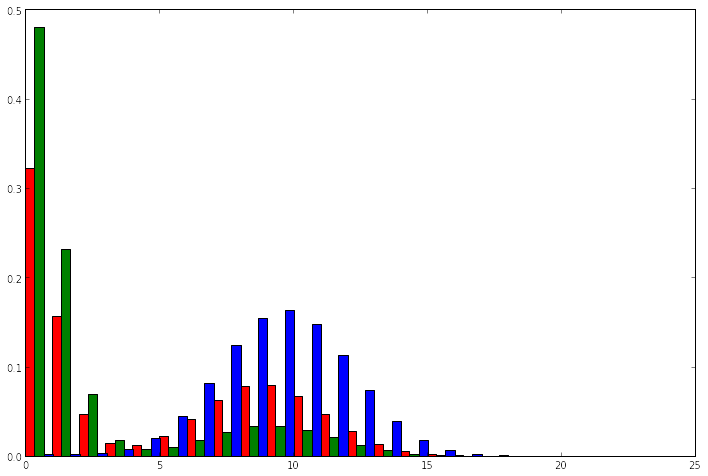

In [4]:
idx_ss = 1999

hist_path_original = cwd + '/original/2017.02.23--22-07-41/photon_histogram.dat'
cavity_occupations_original = csv_load(hist_path_original)
snapshots = cavity_occupations_original.shape[1]
cavity_occupations_ss_original = np.mean(cavity_occupations_original[:,idx_ss:snapshots], axis=1)

hist_path_modified = cwd + '/multi_noise/steady_state_dip/2017.02.23--22-04-32/photon_histogram.dat'
cavity_occupations_modified = csv_load(hist_path_modified)
snapshots = cavity_occupations_modified.shape[1]
cavity_occupations_ss_modified = np.mean(cavity_occupations_modified[:,idx_ss:snapshots], axis=1)

rho_ss = qload(cwd + '/qutip_steady_state_dip/density_matrix')
rho_c_ss = rho_ss.ptrace(0)
cavity_occupations_qutip = rho_c_ss.diag()

width = 0.35
ind = np.arange(cavity_occupations_qutip.size)
fig, ax = plt.subplots()
plot_qutip = ax.bar(ind, cavity_occupations_qutip, width, color='r')
plot_modified = ax.bar(ind + width, cavity_occupations_ss_modified, width, color='g')
plot_original = ax.bar(ind + 2*width, cavity_occupations_ss_original, width, color='b')

Loaded Qobj object:
Quantum object: dims = [[20, 5], [20, 5]], shape = [100, 100], type = oper, isHerm = True



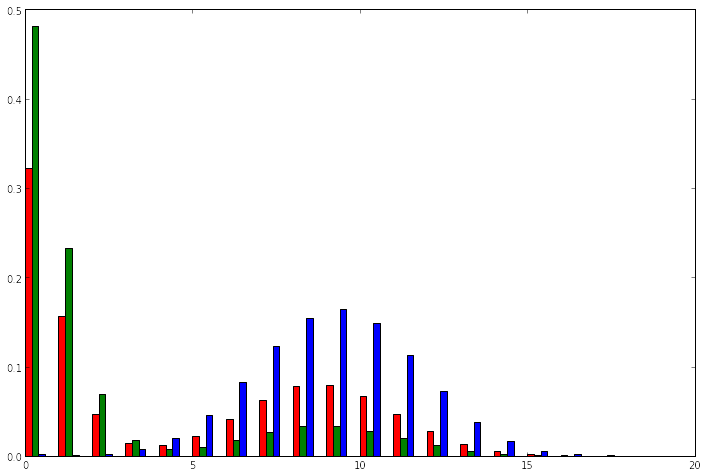

In [170]:
idx_ss = 1900

hist_path_original = cwd + '/original/2017.02.23--22-07-41/photon_histogram.dat'
cavity_occupations_original = csv_load(hist_path_original)
snapshots = cavity_occupations_original.shape[1]
cavity_occupations_ss_original = np.mean(cavity_occupations_original[:,idx_ss:snapshots], axis=1)

hist_path_modified = cwd + '/multi_noise/steady_state_dip/2017.02.23--22-04-32/photon_histogram.dat'
cavity_occupations_modified = csv_load(hist_path_modified)
snapshots = cavity_occupations_modified.shape[1]
cavity_occupations_ss_modified = np.mean(cavity_occupations_modified[:,idx_ss:snapshots], axis=1)

rho_ss = qload(cwd + '/qutip_steady_state_dip/density_matrix')
rho_c_ss = rho_ss.ptrace(0)
cavity_occupations_qutip = rho_c_ss.diag()

width = 0.2
ind = np.arange(cavity_occupations_qutip.size)
fig, ax = plt.subplots()
plot_qutip = ax.bar(ind, cavity_occupations_qutip, width, color='r')
plot_modified = ax.bar(ind + width, cavity_occupations_ss_modified, width, color='g')
plot_original = ax.bar(ind + 2*width, cavity_occupations_ss_original, width, color='b')

In [166]:
mean_photons = mean_photons_calc(cavity_occupations_modified)

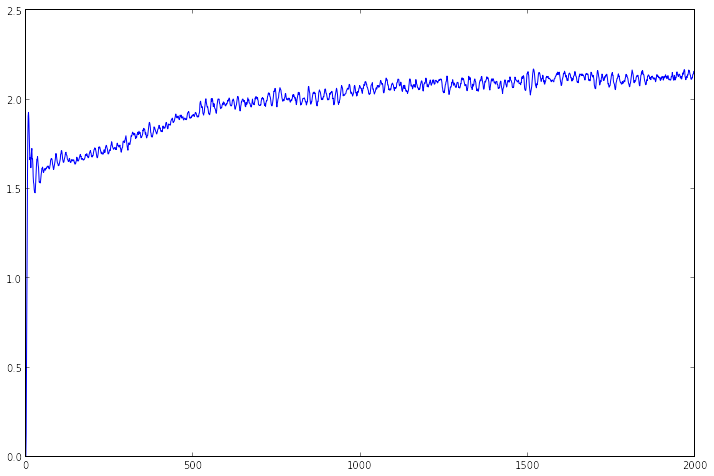

In [167]:
plt.plot(mean_photons)

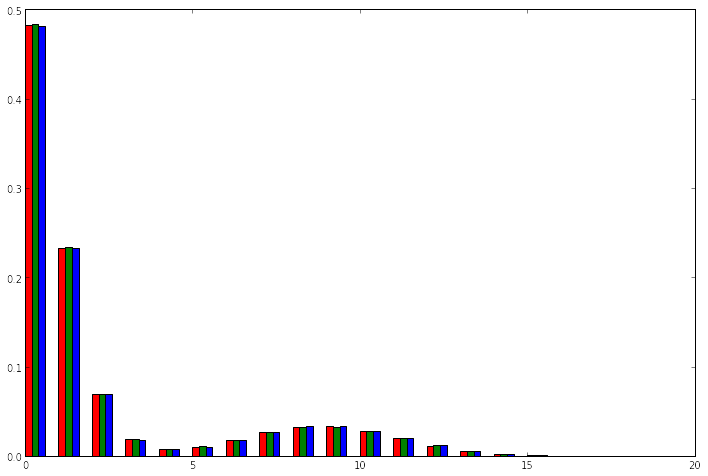

In [171]:
window = 100
idx1 = 1500
idx2 = 1700
idx3 = 1900

hist_path_modified = cwd + '/multi_noise/steady_state_dip/2017.02.23--22-04-32/photon_histogram.dat'
cavity_occupations_modified = csv_load(hist_path_modified)
snapshots = cavity_occupations_modified.shape[1]

cavity_occupations_modified1 = np.mean(cavity_occupations_modified[:,idx1:idx1+window], axis=1)
cavity_occupations_modified2 = np.mean(cavity_occupations_modified[:,idx2:idx2+window], axis=1)
cavity_occupations_modified3 = np.mean(cavity_occupations_modified[:,idx3:idx3+window], axis=1)

width = 0.2
ind = np.arange(cavity_occupations_qutip.size)
fig, ax = plt.subplots()
plot_qutip = ax.bar(ind, cavity_occupations_modified1, width, color='r')
plot_modified = ax.bar(ind + width, cavity_occupations_modified2, width, color='g')
plot_original = ax.bar(ind + 2*width, cavity_occupations_modified3, width, color='b')